In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load datasets
inventory_df = pd.read_csv("inventory_data.csv")
patient_df = pd.read_csv('patient_data.csv')
staff_df = pd.read_csv('staff_data.csv')
financial_df = pd.read_csv('financial_data.csv')

sns.set_theme(style="whitegrid", palette="pastel")

Data Summary

In [ ]:
print("Inventory Data Summary")

display(inventory_df.head())
print("Patient Data Summary")

display(patient_df.head())
print("Staff Data Summary")

display(staff_df.head())
print("Financial Data Summary")

display(financial_df.head())

Inventory Data Summary


,Date,Item_ID,Item_Type,Item_Name,Current_Stock,Min_Required,Max_Capacity,Unit_Cost,Avg_Usage_Per_Day,Restock_Lead_Time,Vendor_ID
0,2024-10-01,105,Consumable,Ventilator,1542,264,1018,4467.55,108,17,V001
1,2024-10-02,100,Equipment,Ventilator,2487,656,3556,5832.29,55,12,V001
2,2024-10-03,103,Equipment,Surgical Mask,2371,384,5562,16062.98,470,6,V001
3,2024-10-04,103,Consumable,Surgical Mask,2038,438,1131,744.10,207,15,V002
4,2024-10-05,107,Equipment,IV Drip,2410,338,1013,15426.53,158,12,V003


Patient Data Summary


,Patient_ID,Admission_Date,Discharge_Date,Primary_Diagnosis,Procedure_Performed,Room_Type,Bed_Days,Supplies_Used,Equipment_Used,Staff_Needed
0,P001,2024-10-06 05:30:28,2024-10-23 01:11:34,Diabetes,Appendectomy,General Ward,2,"Gloves, IV",Surgical Table,2 Surgeons
1,P002,2024-10-24 11:07:58,2024-10-15 05:16:54,Fracture,Appendectomy,ICU,10,"Gown, IV",MRI Machine,1 Nurse
2,P003,2024-10-22 21:43:43,2024-10-24 10:56:30,Fracture,Chest X-ray,ICU,10,"Gloves, IV",X-ray Machine,"1 Nurse, 1 Doctor"
3,P004,2024-10-05 17:04:05,2024-10-30 14:10:01,Diabetes,Chest X-ray,ICU,11,"Gloves, IV",X-ray Machine,1 Nurse
4,P005,2024-10-21 17:04:00,2024-10-08 15:53:22,Appendicitis,MRI,ICU,2,"Gloves, IV",X-ray Machine,2 Surgeons


Staff Data Summary


,Staff_ID,Staff_Type,Shift_Date,Shift_Start_Time,Shift_End_Time,Current_Assignment,Hours_Worked,Patients_Assigned,Overtime_Hours
0,S001,Surgeon,2024-10-22 04:44:49,06:00 PM,07:00 PM,ER,8,9,1
1,S002,Nurse,2024-10-03 05:51:36,08:00 AM,06:00 PM,General Ward,9,3,0
2,S003,Technician,2024-10-15 15:11:14,08:00 AM,06:00 PM,ER,8,6,4
3,S004,Surgeon,2024-10-09 20:07:58,07:00 AM,06:00 PM,General Ward,11,6,3
4,S005,Surgeon,2024-10-12 05:01:02,07:00 AM,06:00 AM,General Ward,9,5,3


Financial Data Summary


,Date,Expense_Category,Amount,Description
0,2024-10-01,Staffing,29391.86,Surgical masks
1,2024-10-02,Supplies,47757.71,Surgical masks
2,2024-10-03,Supplies,43996.60,Ventilators
3,2024-10-04,Supplies,27908.42,Surgeons' salaries
4,2024-10-05,Equipment,39719.60,Ventilators


In [ ]:
# Rename Date columns for distinction
inventory_df = inventory_df.rename(columns={'Date': 'Inventory_Date'})
financial_df = financial_df.rename(columns={'Date': 'Financial_Date'})

In [ ]:
# Convert date columns to datetime
inventory_df['Inventory_Date'] = pd.to_datetime(inventory_df['Inventory_Date'])
patient_df['Admission_Date'] = pd.to_datetime(patient_df['Admission_Date'])
patient_df['Discharge_Date'] = pd.to_datetime(patient_df['Discharge_Date'])
staff_df['Shift_Date'] = pd.to_datetime(staff_df['Shift_Date'])
financial_df['Financial_Date'] = pd.to_datetime(financial_df['Financial_Date'])

In [ ]:
# Combine dataframes
combined_df = pd.concat([inventory_df, patient_df, staff_df, financial_df], axis=1)
combined_df.fillna(0, inplace=True)  # Fill NaNs with 0

In [ ]:
Visualization

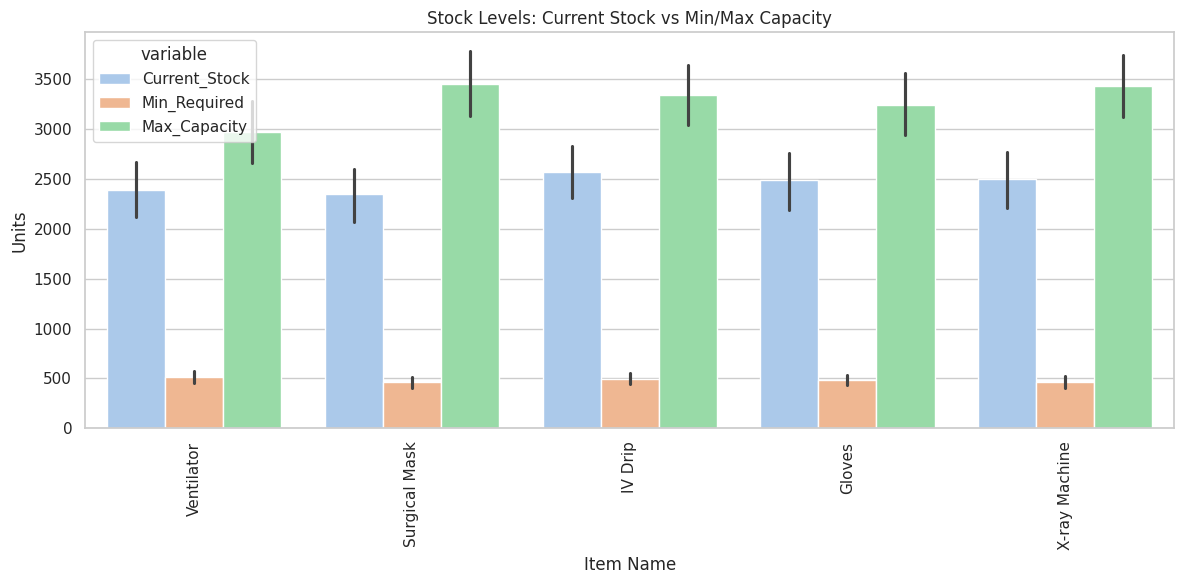

In [ ]:
# Data for Current_Stock vs Min_Required and Max_Capacity
plt.figure(figsize=(12, 6))
combined_df_melted = combined_df.melt(id_vars=["Item_Name"], value_vars=["Current_Stock", "Min_Required", "Max_Capacity"])

# Bar plot for stock levels
sns.barplot(x='Item_Name', y='value', hue='variable', data=combined_df_melted)
plt.xticks(rotation=90)
plt.title('Stock Levels: Current Stock vs Min/Max Capacity')
plt.ylabel('Units')
plt.xlabel('Item Name')
plt.tight_layout()
plt.show()

This visualization compares each item’s current stock against both its minimum required level and maximum storage capacity. By looking at the height of the bars, you can immediately see which items are at risk of stockouts;these are the ones where current stock falls below the minimum threshold. Items where current stock approaches or exceeds 90% of maximum capacity indicate potential overstocking, which can increase storage costs and tie up capital. Items whose stock levels fall comfortably between the minimum and maximum values show balanced inventory management. Overall, this chart helps identify which SKUs require urgent replenishment and which may need stock reduction to optimize inventory flow.

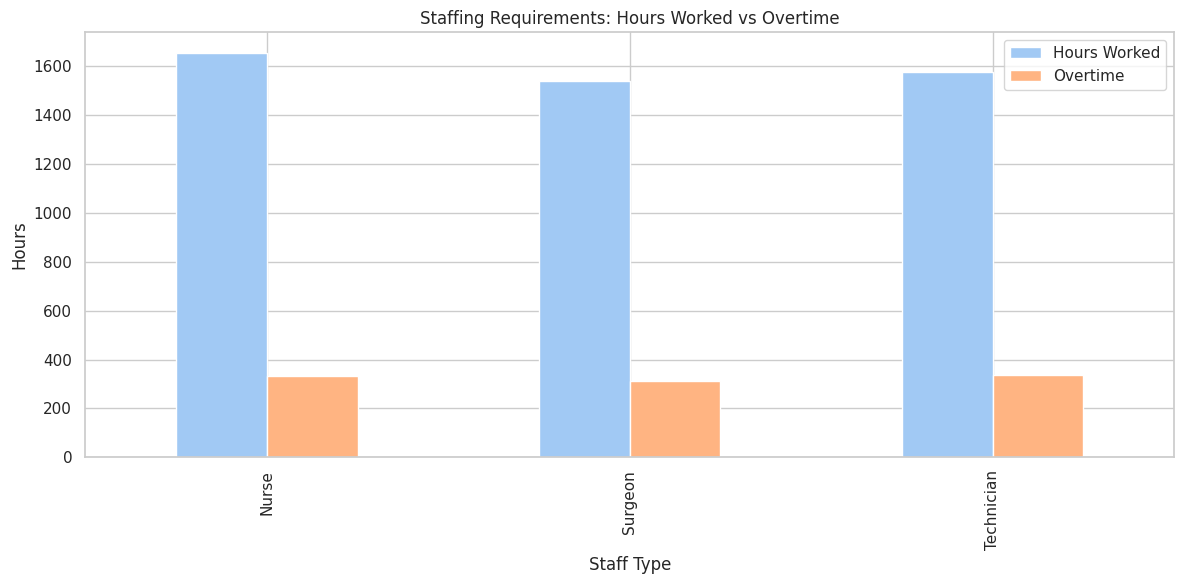

In [ ]:
# Grouped bar chart for staffing requirements vs hours worked
staff_df = combined_df.groupby('Staff_Type').agg({'Hours_Worked': 'sum', 'Overtime_Hours': 'sum'}).reset_index()
staff_df.plot(x='Staff_Type', kind='bar', stacked=False, figsize=(12, 6))
plt.title('Staffing Requirements: Hours Worked vs Overtime')
plt.ylabel('Hours')
plt.xlabel('Staff Type')
plt.legend(['Hours Worked', 'Overtime'])
plt.tight_layout()
plt.show()

This chart displays how many hours staff worked across different staff types, alongside the amount of overtime reported. When overtime makes up more than 20% of total hours for a staff group, it signals a workload imbalance or understaffing in that area. If the regular hours worked exceed typical staffing expectations—such as surpassing full-time equivalents;it suggests operational strain or high patient demand. Conversely, staff categories with low hours and minimal overtime may be overstaffed or underutilized. This visualization helps interpret where labor shortages or inefficiencies exist and highlights departments that may require schedule adjustments, cross-training, or resource redistribution.

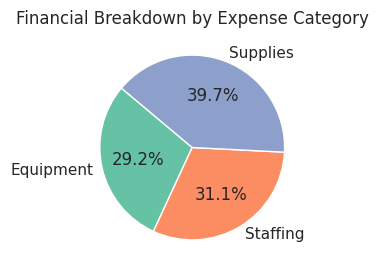

In [ ]:
# Pie chart for financial expenses by category
expense_df = combined_df.groupby('Expense_Category').agg({'Amount': 'sum'}).reset_index()
plt.figure(figsize=(3, 3))
plt.pie(expense_df['Amount'], labels=expense_df['Expense_Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Financial Breakdown by Expense Category')
plt.show()

The expense pie chart illustrates how the organization’s total financial spending is distributed across categories such as procurement, transportation, storage, and labor. Categories that account for more than 30–40% of spending represent major cost drivers and often become the primary targets for strategic cost reduction. Elevated transportation spending may indicate inefficiencies in routing, shipping methods, or carrier selection. High procurement costs could reflect expensive suppliers or large volume purchasing. If storage and warehousing expenses rise above expected levels, it may signal overstocking or excessive space allocation. This view helps pinpoint where financial resources are being concentrated and where operational improvements could produce meaningful savings.

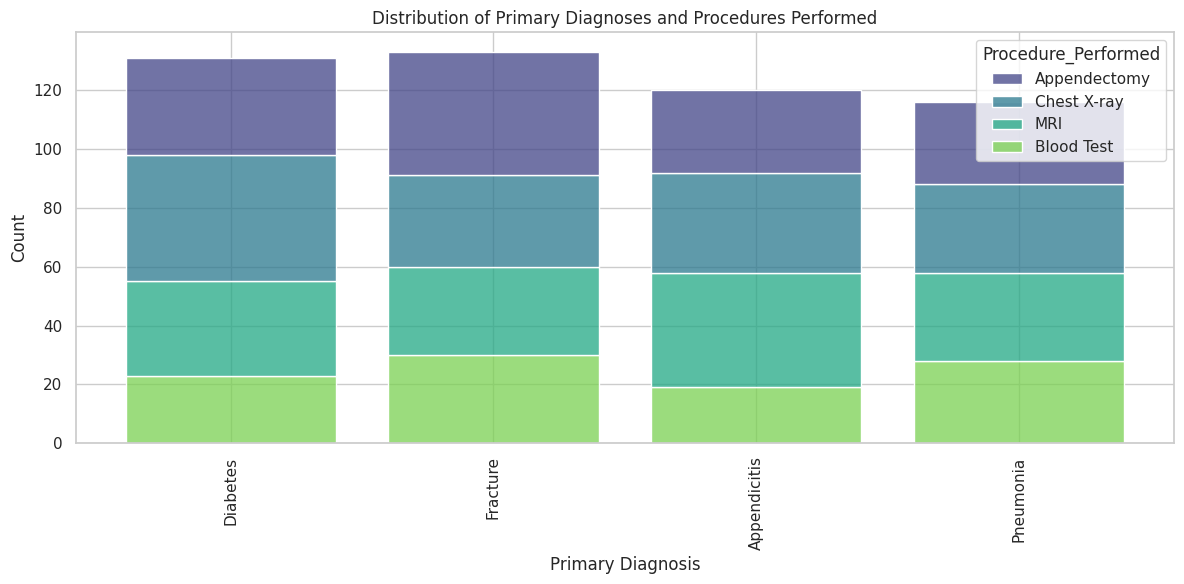

In [ ]:
# Stacked bar chart for patient diagnosis and procedures
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='Primary_Diagnosis', hue='Procedure_Performed', multiple='stack', shrink=0.8, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Primary Diagnoses and Procedures Performed')
plt.ylabel('Count')
plt.xlabel('Primary Diagnosis')
plt.tight_layout()
plt.show()

This visualization shows how frequently each primary diagnosis appears and how procedures are distributed across those diagnoses. Taller bars represent diagnoses with high patient volume, while the stacked colors indicate which procedures are most frequently performed for each diagnostic category. Diagnoses with heavy procedure stacks demand more equipment, supplies, and clinician time, guiding resource allocation. In contrast, diagnoses with very small counts or minimal procedure diversity may require fewer operational resources. Overall, this chart connects clinical activity directly to resource consumption and helps determine which diagnoses drive the largest share of operational demand.

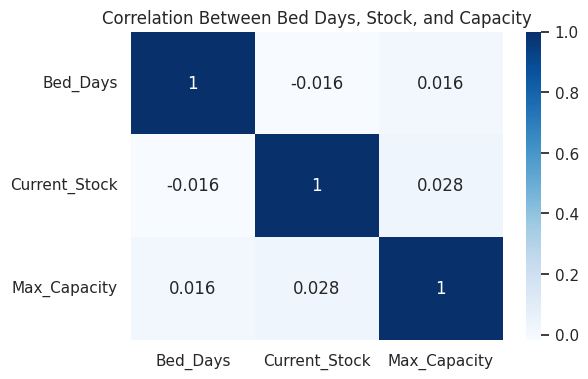

In [ ]:
# Heatmap for correlation between bed days and supplies/equipment usage
correlation_df = combined_df[['Bed_Days', 'Current_Stock', 'Max_Capacity']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_df, annot=True, cmap='Blues')
plt.title('Correlation Between Bed Days, Stock, and Capacity')
plt.show()

The heatmap displays correlation coefficients between total bed days and inventory-related variables such as current stock and maximum capacity. Strong positive correlations typically above 0.7 indicate that the variables move together consistently, such as higher patient stays driving increased consumption of inventory. Moderate correlations suggest partial relationships, while low correlations imply minimal connection between patient volume and stock behavior. If current stock is strongly correlated with maximum capacity but not with bed days, it suggests stocking decisions may be fixed or habitual rather than demand-driven. This heatmap helps determine whether inventory management aligns with actual patient utilization patterns.

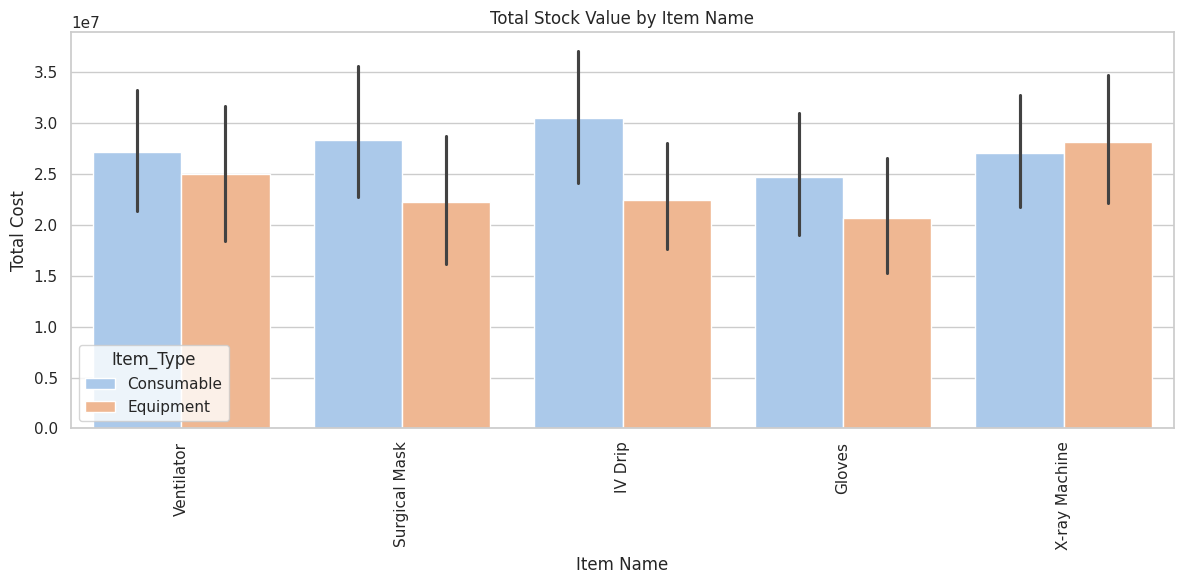

In [ ]:
# Bar chart for inventory cost analysis
combined_df['Total_Stock_Value'] = combined_df['Current_Stock'] * combined_df['Unit_Cost']
plt.figure(figsize=(12, 6))
sns.barplot(x='Item_Name', y='Total_Stock_Value', hue='Item_Type', data=combined_df)
plt.xticks(rotation=90)
plt.title('Total Stock Value by Item Name')
plt.ylabel('Total Cost')
plt.xlabel('Item Name')
plt.tight_layout()
plt.show()

This chart shows the total monetary value tied up in each item by multiplying its current quantity with its unit cost. Items with the highest bar heights represent high-value inventory, meaning the organization bears greater financial risk if those items are overstocked, misused, or allowed to expire. Lower-value items carry less financial exposure but may still cause operational issues if stockouts occur frequently. This visualization is essential for identifying which items deserve tighter control, forecasting accuracy, or storage oversight due to the amount of capital invested in them

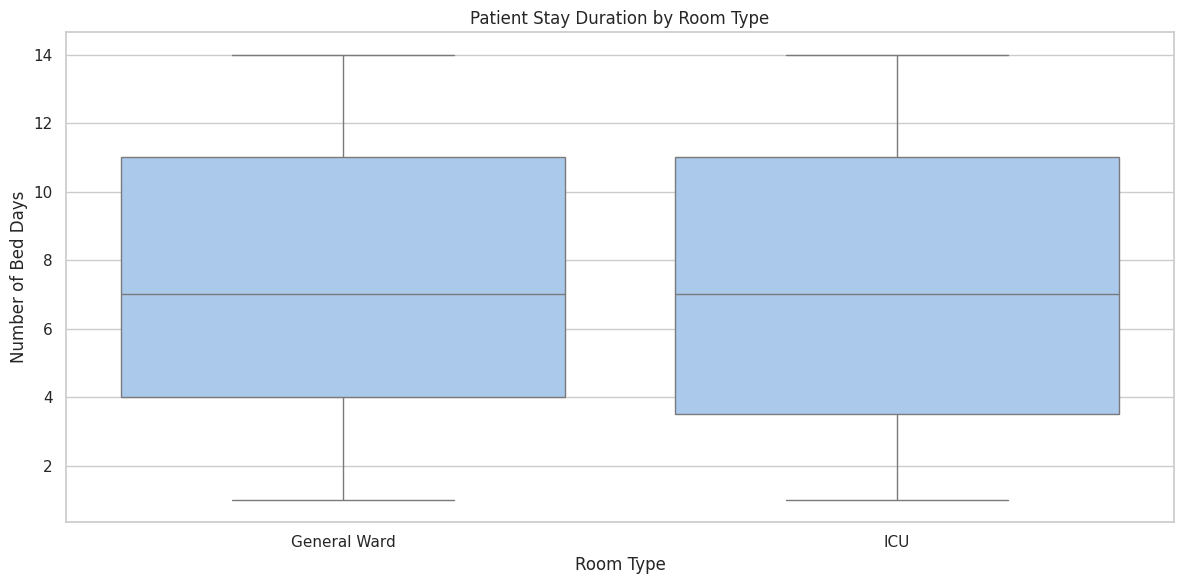

In [ ]:
# Box plot for patient stay duration analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Room_Type', y='Bed_Days', data=combined_df)
plt.title('Patient Stay Duration by Room Type')
plt.ylabel('Number of Bed Days')
plt.xlabel('Room Type')
plt.tight_layout()
plt.show()

The boxplot illustrates how patient lengths of stay vary across different room types. The median line within each box reflects the typical number of bed days, while the height of the box indicates variability in patient stays. Room types with tall boxes or long whiskers experience highly variable occupancy, which complicates bed assignment and capacity planning. Outliers at the top of the whiskers represent unusually long stays, often tied to complex cases or delays in discharge processes. This visualization helps highlight which room types require more flexible staffing, cleaning, and bed turnover strategies to accommodate fluctuating patient demand.

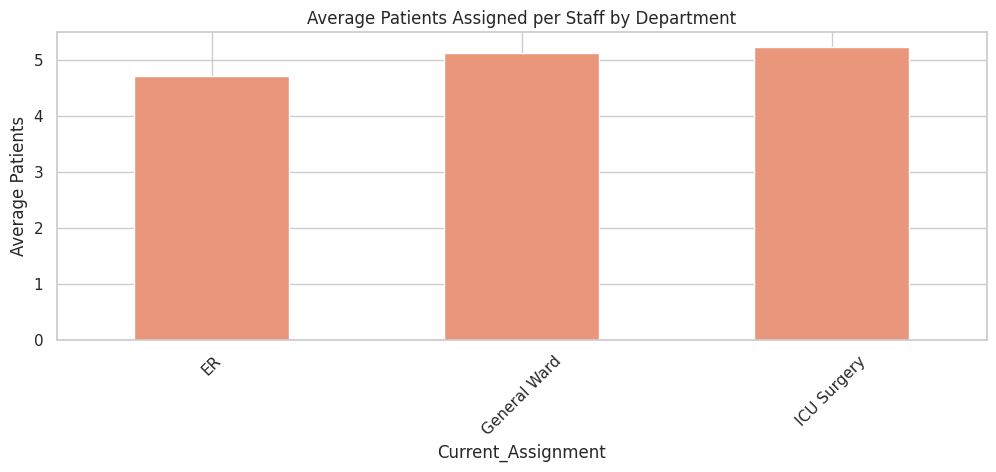

In [ ]:
# Average number of patients assigned to staff in different hospital areas
plt.figure(figsize=(12, 4))
combined_df.groupby('Current_Assignment')['Patients_Assigned'].mean().plot(kind='bar', color='darksalmon')
plt.title('Average Patients Assigned per Staff by Department')
plt.ylabel('Average Patients')
plt.xticks(rotation=45)
plt.show()

This bar chart represents the average number of patients each staff member is responsible for within different departments. A higher average such as beyond six to eight patients per staff indicates heavy workload and potential risks to care quality or response time. Low averages may suggest overstaffing, low patient volumes, or uneven assignment distribution. Understanding these numbers is crucial for balancing workloads, preventing burnout, and ensuring equitable staffing across departments.

In [ ]:
Feature Engineering

In [ ]:
# Create a Target Variable
combined_df['Estimated_Demand'] = combined_df['Avg_Usage_Per_Day'] * combined_df['Restock_Lead_Time']

# Identify and predict inventory gaps
combined_df['Inventory_Shortfall'] = (combined_df['Min_Required'] - combined_df['Current_Stock']).clip(lower=0)

# Accounts for maximum capacity and minimum requirements when estimating inventory needs
combined_df['Replenishment_Needs'] = (combined_df['Max_Capacity'] - combined_df['Current_Stock']).clip(lower=0)

In [ ]:
# Drop identifiable columns
columns_to_drop = ['Item_ID', 'Vendor_ID', 'Patient_ID', 'Staff_ID']
combined_df = combined_df.drop(columns=columns_to_drop, axis=1)

In [ ]:
Encoding

In [ ]:
# Identify columns with object dtype
object_columns = combined_df.select_dtypes(include=['object']).columns

# One-hot encode the object columns
combined_df_encoded = pd.get_dummies(combined_df, columns=object_columns, drop_first=True)
combined_df_encoded.fillna(0, inplace=True)  # Fill NaNs with 0

In [ ]:
Modeling

Validation Mean Absolute Error: 215.72222650608197
Validation Mean Absolute Error: 215.72222650608197
Test Mean Absolute Error: 157.16818822353352


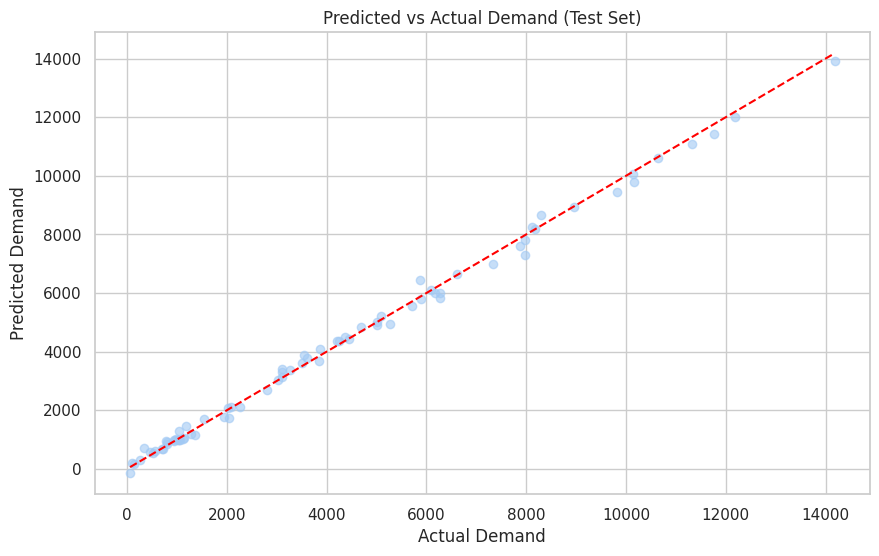

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error


# Target variable
y = combined_df_encoded['Estimated_Demand']

# Drop target and non-relevant columns from the feature set
X = combined_df_encoded.drop(['Estimated_Demand', 'Inventory_Date', 'Admission_Date',
                              'Discharge_Date', 'Shift_Date', 'Financial_Date'], axis=1)
# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
print(f"Validation Mean Absolute Error: {val_mae}")

print(f"Validation Mean Absolute Error: {val_mae}")

# Test the model
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"Test Mean Absolute Error: {test_mae}")

# Visualize predictions vs actual for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Predicted vs Actual Demand (Test Set)')
plt.show()

This scatter plot evaluates the performance of the demand forecasting model by comparing predicted values to actual recorded demand. Ideally, the points should line up along the diagonal reference line, indicating accurate predictions. A wide vertical spread of points means greater error for certain predictions, while systematic deviations above or below the line indicate consistent over- or under-prediction. The Mean Absolute Error (MAE) printed earlier quantifies the average prediction deviation in units. This visualization helps assess whether the model is reliable enough to support inventory planning or whether further tuning is required to improve accuracy

Areas for Improvement and Future Work:

Despite generating actionable insights, several opportunities remain to expand and strengthen the analysis:

1. Richer and More Granular Data:
Incorporating real-time supply chain data—such as supplier lead times, shipment tracking, and consumption logs—would allow more sophisticated modeling of bottlenecks and shortages. Access to historical patient admission data and seasonality trends would also improve forecast accuracy.

2. Integration of Predictive Inventory Models:
While demand forecasting was initiated, adding models such as ARIMA, LSTM networks, or probabilistic safety-stock optimization could provide more reliable predictions, especially for items with volatile usage patterns.

3. Scenario and Risk Analysis:
Simulating disruptions (e.g., supplier delays, surges in patient volume, emergency events) would help hospitals prepare for crises—something increasingly important given workforce shortages and supply chain instability in the U.S.

4. Cost-to-Outcome Analysis:
Linking financial data to patient outcomes or service levels would help quantify how inventory and staffing decisions affect both care quality and operational performance.

In a healthcare environment where U.S. hospitals continue to face supply shortages, rising costs, and staffing imbalances, this project demonstrates how data analytics can provide clarity and strategic direction. The insights generated here support more resilient inventory systems, more balanced staffing, and more informed financial planning—all critical components of modern healthcare operations. Ultimately, this work contributes to solving the larger systemic challenge of delivering reliable, efficient, and high-quality care in a strained and unpredictable healthcare landscape.